In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme(style='white')
energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table = energy_table[energy_table.Code=='KOR']
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='KOR']
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='KOR']
KOR_table = pd.merge(gdp_table, pop_table, on=['Year'])
KOR_table = pd.merge(KOR_table, energy_table, on=['Year'])
KOR_table.head()

,Entity_x,Code_x,Year,GDP per capita,145446-annotations,Entity_y,Code_y,"Total population (Gapminder, HYDE & UN)",Entity,Code,Primary energy consumption (TWh)
0,South Korea,KOR,1965,1917.43,NaN,South Korea,KOR,28896000,South Korea,KOR,74.690
1,South Korea,KOR,1966,2093.89,NaN,South Korea,KOR,29573000,South Korea,KOR,90.592
2,South Korea,KOR,1967,2232.05,NaN,South Korea,KOR,30237000,South Korea,KOR,104.114
3,South Korea,KOR,1968,2468.48,NaN,South Korea,KOR,30892000,South Korea,KOR,119.353
4,South Korea,KOR,1969,2764.15,NaN,South Korea,KOR,31544000,South Korea,KOR,144.076


In [23]:
pop = KOR_table['Total population (Gapminder, HYDE & UN)']
gdp = KOR_table['GDP per capita']*pop
energy = KOR_table['Primary energy consumption (TWh)']
year = KOR_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)

46.27451368186875 -91055.11213325919 1800 500 1 2000 2013 2200


Text(0, 0.5, 'Energy TWh')

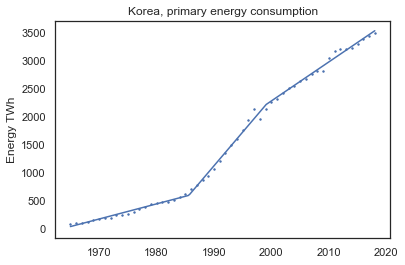

In [24]:
import math as math
plt.scatter(year, energy, s=2)
a, b = reg.linReg(year[:30], energy[:30])
a,b, c, e, g, x1, x2, x3 = a, b, 1800, 500, 1, 2000, 2013, 2200
print(a,b, c, e, g, x1, x2, x3)
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, energy, p0 =(a,b, c, e, g, x1, x2, x3 ), bounds = [-600000, 3000])
plt.plot(yplot, reg.llll(yplot, a,b, c, e, g, x1, x2, x3 ))
plt.plot([x1, x1], [0, 8], label=str(int(x1)))
plt.plot([x2, x2], [0, 8], label=str(int(x2)))
plt.title('Korea, primary energy consumption')
plt.ylabel("Energy TWh")


Text(0, 0.5, '10e12 $')

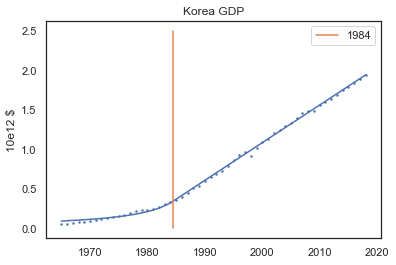

In [25]:
plt.scatter(year, gdp/10**12, s=2)
plt.title('Korea GDP')
b,c,d,f,x1,x2 = 12, 1983,0.033,0.025,1971,2009
# plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
b,c,d,f,x1,x2 = reg.hypLinLin (year, gdp/10**12, p0=(b,c,d,f,x1,x2), bounds = [-2, 2100])
plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.plot([x1, x1], [0, 2.5], label=str(int(x1)))
# plt.plot([x2, x2], [0, 2.5], label=str(int(x2)))
plt.legend()
plt.ylabel('10e12 $')

Text(0, 0.5, '10e-9 TWh/$')

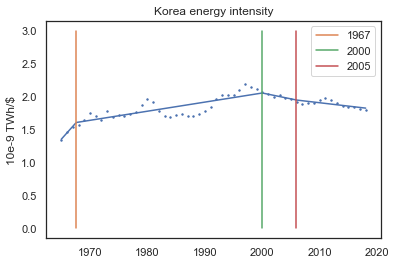

In [26]:
plt.scatter(year,(energy/gdp)*10**9, s=2)
a,b, c, e, g, x1, x2, x3 = 0.2, -394, -0.05, 0.8, -0.3, 1976, 2002,3000
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, (energy/gdp)*10**9, p0 = (0.2, -394, -0.05, 0.8, -0.3, 1976, 2002,2006)) 
plt.plot(yplot, reg.llll(yplot, a,b, c, e, g, x1, x2, x3))
plt.plot([x1, x1], [0, 3], label=str(int(x1)))
plt.plot([x2, x2], [0, 3], label=str(int(x2)))
plt.plot([x3, x3], [0, 3], label=str(int(x3)))
plt.legend()
plt.title("Korea energy intensity")
plt.ylabel("10e-9 TWh/$")


Text(0.5, 1.0, 'Variation in (%), Korea')

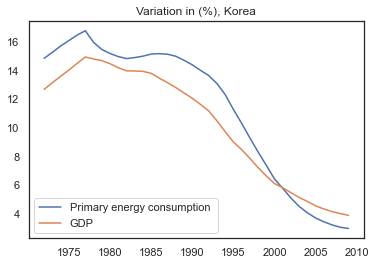

In [27]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), Korea")
